# PD Controller

Getting robots to move in to a desired joint confiuguration or location is essential in robotics. One pf the simplest ways to achieve this is by using Proportional-Derivative (PD) controllers. The first component of the controller referred to as the proportional controller applies a control input that is proportional to the error between the current position of the robot and the desired/ reference position of the robot. The second component, Derivative controller, applies a control that tries to track a desired velocity. The combination of these two components result in robots trakcing desired reference motions. 

Mathematically the proportional control input is $K_{p} * (x_{des} - x)$, where $K_{p}$ is the proportional gain provided by the user. $x$ is the current locaiton of the robot and $x_{des}$ is the desired /reference location for the robot. $K_{p}$ determines how quickly or strictly the controller should track the reference motion. Similarly, the second component, the derivative controller can be written mathematically as $K_{d}*(v_{des} - v)$, where $K_{d}$ is the derivative gain provided by the user, $v$ is the current velocity of the robot and $v_{des}$ is the desired velocity.

Hence, totally the PD controller equation for a robot whose joint configuration is $\theta = (\theta_{1}, ...., \theta_{n})$ and joint velocity is $\dot{\theta} =  (\dot{\theta_{1}}, ...., \dot{\theta_{n}})$ is 

    $\tau = K_{p}*(\theta_{des} - \theta) + K_{d}*(\dot{\theta_{des}} - \dot{theta})$
    
In this tutorial you will implement a PD controller and use it to move a robot from its current configuration to a desired configuration. 

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABIyG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABbGZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8oYJVUBByf4O5YtZ6qGZLtT17Eogp
jCCTv3ncxYbd/iUaemh41E8s/58OpW3qZfUSgOEKBL/FwAAVkkNY/TuUMdzGZjXRqm///is42csw
2GRsDZlgfqbtbKDrl33R3UyHXGK4fjlQtRTi+K+sRCXJWD4gwfaScWKb8rN5RSQH/EzL0te9XXON
dLxmUR06/2kVxy4b4OXQuteBVqWFTWsdirxF2PG+YHZkVBgwnjR//Q//7OVkI2ivBZYPNnPW+rnz
LA6SbGVhcc/qSF1FMbc95U51nSR1xGDNNSZ6oL6GQ9rLvueP0V7jVY2bedKOVJcqlNMnDjCIa/mN
R5V89FLKjc1WMR0Q4jtFDb5eFcU0+Ce4pstOEvU7FFPhPNJgojo0D+sltav3lHjZv1qI3KE0yiSr
zsugT9Lch9FGk8YX2t7dXjRQa1WN8Dqshqtp+UZ8Ua9CrC7eSjceB96nWNhoPwTyZFZnGV0E5066
Id/EjFUbKwSIKK+MzcIiMaEw257tFExiVVfpcrCtI7iQ/0dZ3tvihnGiHRF0RzOUsRRsJgHR7hti
Oiq3OJER77rZ4Vk2KdaqlcdVJE3eOjFcs2QGRcZHKF5PphkC8Rz0ny8mBDDbcsxJ8dGmQqUAvbzD
SxIUmHi7iGaSkun8x98KpJLiWNSTi7ggRHOaGalMiW8Ujf76kCL8cBGknVpDUFGHbKvMk+e0TXph
XnJ8NtN2yBytgcndIyU7ugipG3ZVMXOUNxvgreB2MzEDWVjeNNRPNWWgPq9NOepT6y2Bq8A2Z9YN
+LpzpXQUbR+ukfoWJO0I6ZdvvlrPTolGAs+5Vgt14Dfkn3yMqyDUZebsj8T0hrOUfLbVAVJ8yC3A
RZvksLNznwB/V7wO5Rg0r2sWw1w4WZpMrRHjjwgHbTXcoatng5cRqnta2avZsG5Jsb72mmTq/7UA
msczVCpkUlylcqx1Gccujl8jgdVTeSILZvH5oQWvKWJwPMhdueRoLmKHUsjNr7KsLXsATKVzo98k
znfBdTC+huk1BYhD8GVYmb6bxulRV79v51AZbyyxdKRKryOBPq1dbUBYWxilbywljezoAnzpV+d3
k3tG+aUt62O3yuS+xUqRAa4jKbDqJemkn9Qp7LDVmsywwcBI4GHupt6XTn2gYB9hriaqZ8lfx4n5
griZMQlNndHwGgyXCOj9SBoSCKlyq/y9YwlocZYaIl/jdj/TmQAMcdSWDSuKjKPz3swMF3tweNEv
8dj8q31QvWfrm8EgXY1brhA5MBVeCYecD3OF4KoDDJR+tTfwie6fEyR7iwCnooFaBDGsKMFxqwa3
6n4eyF72c1pkwR0H0jEoGC1c4BaZne/mVL+jTzlxP4z7gMvK7jLNLajFg+3OeH/qEReMhtKQsy3t
sWBb69lL78aWhyWywdrIkLa9gRrAXqiFG6a3/U1x56zE0lPYB8n2Nv7vyeG051d9URFXW5pZNox5
II7P1N8/a7gzwNIXk6U/+WARJcui2P2Vcm4XaJ5AMw/mxMQlcPB1FEOshnzCdU8ht3kFFkVepYNg
2Y22IGldOlaSdpxpOj62R82ESz4MMgr5yeuI/1YQkrZEtGlhzQz+h9AeM74irsL02qfO+7JTtDE4
C1WHJaVB8vxeb6jHCWktMtPUYdCFOdP0k26qiuQYv3ZcbioqB/cduF6JesBFCdBXgUcJDpZ4PnxI
iOZJfWVqNNJo7gHOO0nLVyYcrfwi0pGxI4Nr8dHkbXX6qLOvNHqdVmauuoGH/0IGSILguK4IPm9m
jIFsRiNMaQ44QIrTLZsux53DzTkdAsDAkrEb8Go22NosbuunxDbTJMucokONxebwZhbzUDROy93I
uPh919n6lnVPOndOfNyMABNTwY7YhoOPEk4nPg8mSM3IzOfw0NSer2TBEveG3U+9j+QcYeiN1K7R
djo3OHQh83MddmQU/g2pEm2+X2xmz26DzcPsdjaLJxPLWpXbTmJ4q4kmr1Xsi3agXIO/4aGVgJtk
NGF6ZT60Znv+tfz83vfd/UbjX1G1ESl/7nPBRgLQa7kaMMBIeXiQAHZFiD9p1cLdR8Q9yHTm1Yt9
V4FCbDFZbUdToDbod2OnGHY5Fxbj+0B/asnC71UgW+Ps5b6mHSlWKQgAjlsVfT4TaxSzPst8qQUo
/FRdwbMyOIeUsLOF4qVMih9eYmf07a9uGH0GvJCoOXbPkCZTx/Rc8R4obpWE51EzHNpqMhtkaW9P
cLr7UglPrin6UwIPVz9pj5/9b8O1iG0Fvlhjby4AwFGSQtvIyQc20CZmUEqnRCWMlk0mX3+9mirg
ksq2JtkoQib7piN/t+kXxQsYECEsFUDQW3VW8GVq4V96xbDvgBIR/hij176+vgDMzOe7aYwhwwSi
4xOCW8gnLG+zYbvdct61i0CDWe4mrrZEzruz98A285whXYySCIBdgDQ/p0WttFk454qtGKo9EriS
4ZaT+onlVSy8Fe9dR52niFUkNzldbN6ZLwScPrJ0lt0lFqiAE++huaO+E9W8yVwSd2EovxKbRx21
gA39S5FnX0Y4F0u7WGdJnE5uWfOv5ovKljXhi7WJV7AzmA5M0eUDaYPhMkUwCzTHS+m1eZlh8BNe
lFBhgiLOI/hMerIWHDfByb2rPqem4lYNsV0x8r0GjI04sl99+czH0dyZLFwfi73VZMr9tai74BZg
O+RIJyhHg5/2GmpyE1Bv9z6Oy0uScfjhBNFvT4OsNMKJbrR/6O2zAgclPAh3yvk5SjWCzlwxBlC4
iZ3G7rpZRKgKFu0hnE6OpDb9vC/2dsYe//zems0b5vPCPHoMziqunO32/DZ3ANtVJeJoWiL3gGLK
iAexDibScUaTucbmaglGz

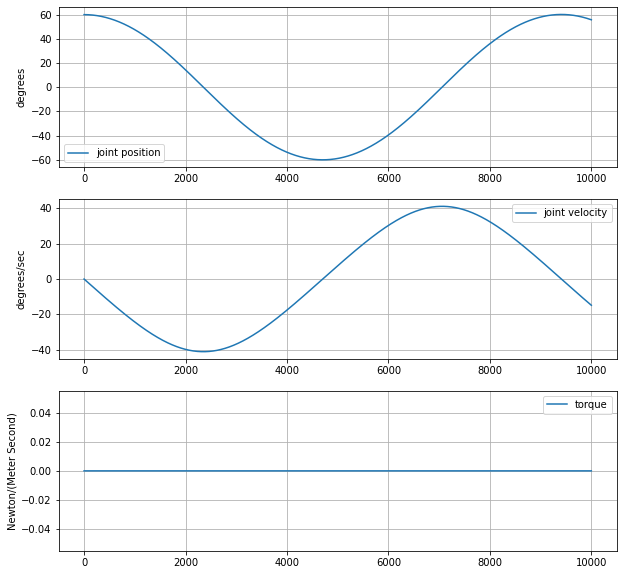

In [1]:
## This file is an implementaion of the pd controller class
## Author : Avadesh Meduri
## Date : 22/06/2020

import numpy
%run double_integrator.ipynb #imports OneDOFMan
%run one_dof_manipulator.ipynb #imports OneDOFMan
%run two_dof_manipulator.ipynb #imports TwoDOFMan

## PD controller class

Use the template below to implement a simple PD controler class. The function compute_torque should take in the current joint position, velocities along with the desired joint position and velocities. Using which it should compute the desired PD control torques using PD controller equation. 

In [3]:
class PDController:
    
    def __init__(self, p_gain, d_gain):
        '''
        Input:
            p_gain : proportional gain
            d_gain : derivative gain
        '''
        self.p_gain = p_gain
        self.d_gain = d_gain
    
    def compute_torque(self, joint_position, joint_velocity, des_joint_position, des_joint_velocity):
        '''
        This function computes the desired torque for each joint to track the
        desired joint position and velocity
        Input:
            joint_position : joint position at the given time step
            joint_velocity : joint velocity at the given time step
            des_joint_position : desired joint position at the given time step
            des_joint_velocity : desired joint velocity at the given time step
        '''
        # compute the position error here
         
        proportional_error = ?
        
        # compute the velocity error here
        
        derivative_error = ?
        
        # compute the desired control torque using the PD controller equation mentioned above
        torque = ?
        
        return torque


## Double Integrator

Congratulations on implementing your first controller !!!!. We will now use your implemented PD controller to move a double integrator (a block of mass $m$) from the origin to $x = 2$. This example should give you an understanding of how the PD controller works. 

As you may remember the double integrator is governed by the dynamics equation $F= m*a$, force is mass times acceleration. The PD controller here decided how much force is to be applied to move the block from point A (origin) to point B ($x=2$)

In [ ]:
env = DoubleIntegrator(1, 1)

Kp = 5 # proportional gain
Kd = 1 # derivative gain

pd_ctrl = PDController(Kp, Kd)

horizon = 5000
des_position = 2
des_velocity = 0

env.reset_double_integrator(0, 0)

for t in range(horizon):
    # getting the current positino of the double integrator
    position = env.get_position()
    # getting the current velocity of the double integrator
    velocity = env.get_velocity()
    # compute the control input using the above implemente pd controller 
    f = pd_ctrl.compute_torque(position, velocity, des_position, des_velocity)
    # input the computed torque to the robot
    env.step_double_integrator(f)
    
env.animate()
env.plot()

## Pendulum (one degree of freedom manipulator)

Now that you have understood how the PD controller moves the block to a desired location, let's try to get a pendulum robot(One DOF Manipulator) to move from a vertical position by 60 degrees using a PD controller. Once you get the pendulum to behave in the desired manner try to answer the following questions :

1. What gains $K_{p}, K_{d}$ did you use to get the robot to move to the desired configuration?
2. What happens if you increase $K_{p}$ while keeping $K_{d}$ constant? 
3. What happens if you increase $K_{d}$ while keeping $K_{p}$ constant? 
4. Try to get the pendulum to move in a circle slowly by changing the desired position constantly and plot the desired joint poisionts. 

Note : create a separate block for question 1-3, and 4. 

In [ ]:
horizon = 10000 # duration of simulation steps
des_joint_position = ?
des_joint_velocity = ?

Kp = ?
Kd = ?

env = OneDOFManipulator(1, 1)
pd_ctrl = PDController(Kp, Kd)

env.reset_manipulator(0,0)

for t in range(horizon):
    # obtaining current joint position and velocity
    joint_position = env.get_joint_position()
    joint_velocity = env.get_joint_velocity()
    
    torque = ?
    env.step_manipulator(torque, True)

env.animate()
env.plot()

## Two Degree of Freedom Manipulator

Now let's try to use the PD controller on a slightly more complicated example. A 2 degrees of freedom (2 dof) manipulator. After implementing the PD controller try to move the robot so that the foot/tip of the robot is located at : 

1. x = 2, y = 0
2. x = 1, y = -1

What gains did you use to get the robot to move smoothly to the above desired locations ?

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABqhm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA9YZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8Emf9QGODiW9NaGpugpV7FMv37VKQ
P9r3eHrv9/0+WzhCgS/xcAAFYA7bDkZ6cpzaXV+QRnkNA2rChN9i75b6OszE0O62RhXijuj9FbwO
rgRRS/03xqgMQdfOwEliAbzoVi03jHarz6/x04+TFwfeUb7f5JUsf//1X43BCkXxgbxyes+F9qt6
9ISAM1Cm/bF2FuAvv0yLi3YAGxztwGIhz5GcC9Z6FzGNGDX3sjwQoSnEM7XZKfRXuCKYmD+YQDRv
PjBupvs25ROP6IcIu6Yov0PfMup2hRnmf+kj4aNDFi3P12M4dU5o9SPkN9Js2B2zekspOshDkzrB
jMmWdeVU/Xg9UTaWwHD5b5BJrXxOs5afvehAAr68GAX37Ek6U2fD0ExntmyDUvBd4AZSp7Q/gLYd
4ue7uDmnsO0kjaYcQOrcBKenWV2ALmDb9xgFAnnr1wGASUOGag0J9dj/Uqd0EGPXid2PO/qxJXkh
XLOCceVKtaTbO8ZFJGzhICL1Vbs8sfvg7mVh+CrKpS9SGVSOArD3/2wFfmNHwb8K0K6AO1V4vKyH
giuy1F1Vxv92uG8GSqCg4oyOdqG6OaVD57cjFibq5q9OeyTbnV2Hb33IOwi1GwaFx+OB5/KOAVZH
WIEiGAya61SRqVGYNA1kWfv1fKTEAlvSHiTAVUf7m580vpAXdrZ5Erf3hLXSJZ+JxQyLfre8hwrS
9gcfqVYrm1Ll8MyKSVum4MMvC2PFTxu/CJM4JjyNAvF5CBfBC9ceS/Z4x9FUD0T0T2ZWSBerZzq5
h20tDnr5q3HSGNN9aGO/JW3KsGJSFBbxvFUDe5kBXPzc1PS0GrsaXVoV9snx3UvlE8vlCOsTbU4D
xZttUIvj9hwVGhWROUmVREgMtFheGEZipArUtyywxFu+fxFylRXca/G7CvvlxXqQjTFbCOVyA1Sd
EFd6GH9/weJZ3Z4nF2H5p7dom0tAG/43QHdZYHMLQBIXfITSpJ/ih9FAP51kufjL2pfJSaKkaoRJ
jrZoKWbuyI+RRUzBgJGzi8cHOTtF7uEPORWjmRlMAEg+xmpFcclNCyi6Z5mmGtV4McQjwbGIgGZn
d70+QdEUk3MZgFUt08BCLzgoXPALRi8J7Ctqf5DLppIkzcv3rd6iHqJEsPpZ2jC5mLSIArv9qwPZ
pwk1iIBN/1Ww/zR/OW9VwG9riZNO34wXvbW2qQgib7RHYk1BsxRaNKZNKqkCMd9THXPCg6d8elnf
2073jtK+lgHZoVuBrDUycZn0YMChPrYMkP5EsXWYC6+nBAvfvjpFP3yw7MbOn9n3uJahgvx9D/UI
N+5z8RC4QcyxhKjGCiryzZ5QCEE4Mc8klaqL6/0whuRvVj1kzvjkffpxpTHC1CkDEX+cvMsxw/u5
wjI6KWsoUcG9mI2iDh8H9uV/0T8rADxVUZPR99zvMG0Wzg4qZeenVB3TCyh0aPlZIq9eODU5qzSv
8t04UNfmQgg0RANJTXyut8GIF1lrn6bTjYn8c2zclCmwEx8b1DLKgtbh1gYrwGTWdSrNFrDVkaGP
KodcRXM4AOLS8lUjfqEtE299nDqoAdnkyApwUMsWf7v11co4RRdEWPUVvB2l25Pma79ki/hJxL78
7k3akt3C+dIAvD6m40XEcE60Df9tGxdBHQxWL8YTkdMe55QI4cKFkF/CgrjrmdSaXeJJ7rP/llmg
Q4N6tpnuR4D1bY6ETdljRlzFXl/JK+nTNDyJP+1tvPpdQsmHESnvys5wWx+EHcnny14leIY3WB2J
bNeexzkzH+g78vjnAhOzEcGVyLMlnkXo2amXm0JLWgNmgJfG8JsHbxcCiJ4OhFRWXO7EWfp+kLhe
CxU44BalmdjLLQE+eGuDE9ZSLhtNo8+cCEfl/ZYV3tz+o2BZo/GWO9qsv4BGJ4w0xPyeNo/i5Adf
VLA5ERqSmnGosGlAI2gAUWqm6HQvcTpm3YlPfDUL6BBf+QqHmsl5jxNC0eX3hBb4q9REfzA4WLAg
rgEdwzn91sO9B4BLrk2BnWxBvhLG++LZszfKWz1Nej/1EF0WlgOHhSOh6DYiGdP3/lpEnmGJ1S7Q
0v0DX/4fVouucasDQQtC+yqn5yPJ0SzidBJhmALz38rPV23RC5y7dDMImYA3pUkBmKBMNLd8ciFP
hNw8hDcjX461CCan9lXR1sJqm3FMm3rvnK8bAp8V5RqvfdTlwBOaWlALENas5uxn9Pt5IapO5VO8
4A9vuMhf5/IvtiXoKabXiIQZDSexZD6EyUofIPxbhdafEA+Er9Z6KPMK/9b1nf2qV1kJzDZx7b6v
HnrVYHnVKj2ooosZHwU7rmmwBlg+U90VP/dBbMkq36y9OtponD88S9cFw/zhKds4GOwNZv9pl4YM
MTicuMPF2eyocdVpoUMe3Cs1qRSjUNc+CqcjQDVaTejMpmx6s7u6E8pf8izI1JWITKBCdm5Wnjfv
K5AsC6foYcOc4dKyIT+JGwVVeP2CL8KcJZeexkYuku71S9EELmeggj1oEC+JKzl9b/drHdoIM28F
4jBc2ovLW9egE2JSOeuQp3zsVfv913sQrcJecUzcO7VJY+5oMsqlL0GYCDxIazPwQDLld9UkdU6C
3vWsll5mUWHWMDl9xV5y4gkfXpKUFLXQge/YicabpqEsvJpDqLHj6sbe9kHnfTBHkoPN+juhFl+t
CE56yYcLFxUz2BJDV0vKeyEIixLonltt48uTePQCsHLDhS9ut4afKYgs57BGp7u4Yk8nQK0bha5+
ic8G1OA1RdbvZf8ECDP5oZ+gX2MXQMnZc5u6TAAkWwE0woolIFAh2JhbW/UAABj9bb8fjk1x4u8m
OrqOWbv/+FoKGoLSiVywj

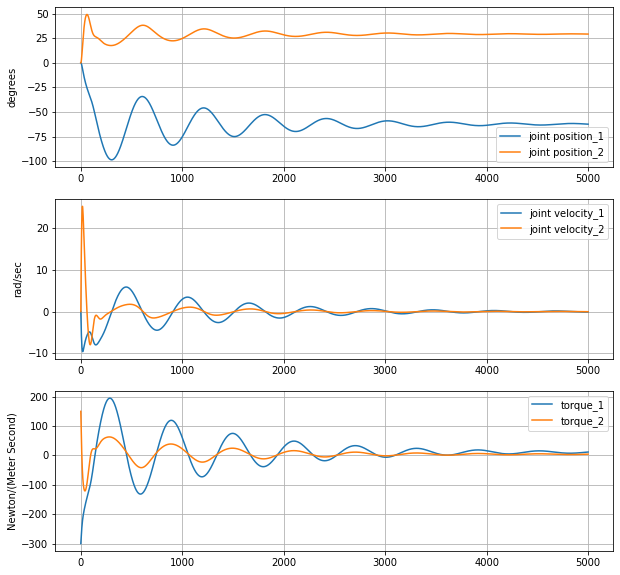

In [4]:
Kp = ?
Kd = ?

pd_ctrl = PDController(Kp, Kd)
env = TwoDOFManipulator(1, 1, 1, 1)

des_th1 = ?
des_th2 = ?

des_thd1 = ?
des_thd2 = ?

env.reset_manipulator(0 ,0, 0, 0)
horizon = 5000 # duration of simulation steps


for t in range(horizon):
    th1_t, th2_t = env.get_joint_position()
    thd1_t, thd2_t = env.get_joint_velocity()
    
    tau1 = ?
    tau2 = ?
    
    env.step_manipulator(tau1, tau2)

env.animate()
env.plot()

## Forward and Inverse Kinematics 

Was it difficult and time consuming to compute the exact joint configuration to get the 2dof robot tip to a desired location? In the next tutorial a more elegant and easier method called forward and inverse kinematics will be introduced to make this computation less painful. 